In [4]:
#!pip install spectral
# !pip install gdal
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.3 MB/s 


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from spectral import imshow, save_rgb
import tifffile as tif

In [ ]:
# Revisão da aula - 2022-07-12
#!pip install gdal
#!pip install rasterio

**TIFFFILE**

In [5]:
import tifffile as tif
import matplotlib.pyplot as plt
from spectral import imshow

In [6]:
img = tif.imread("/content/drive/MyDrive/Colab Notebooks/PDI_com_Python/Modulo_02/L71221071_07120010720_DN.tif")
print(img)

[[[ 64  56  67  87  95  55]
  [ 64  59  70  88 109  61]
  [ 64  57  70  85 109  63]
  ...
  [ 57  50  55  78  94  55]
  [ 61  56  66  77 106  73]
  [255 255 255 255 255 255]]

 [[ 62  57  65  86  93  53]
  [ 64  58  70  87 108  63]
  [ 66  58  70  86 107  63]
  ...
  [ 56  47  51  75  89  54]
  [ 55  50  55  75  92  61]
  [255 255 255 255 255 255]]

 [[ 63  56  62  82  85  48]
  [ 65  57  68  85  98  57]
  [ 64  58  69  85 108  64]
  ...
  [ 55  44  45  76  77  43]
  [ 53  46  42  76  72  39]
  [255 255 255 255 255 255]]

 ...

 [[ 57  45  51  67  85  52]
  [ 58  51  57  83  89  52]
  [ 58  53  59  88  90  51]
  ...
  [ 53  45  50  56  79  48]
  [ 56  45  52  60  84  52]
  [255 255 255 255 255 255]]

 [[ 57  44  51  56  85  51]
  [ 58  47  54  61  86  53]
  [ 57  49  57  68  89  53]
  ...
  [ 54  41  43  53  63  39]
  [ 56  43  44  53  68  41]
  [255 255 255 255 255 255]]

 [[255 255 255 255 255 255]
  [255 255 255 255 255 255]
  [255 255 255 255 255 255]
  ...
  [255 255 255 255 255 2

In [7]:
img.shape

(1233, 1520, 6)

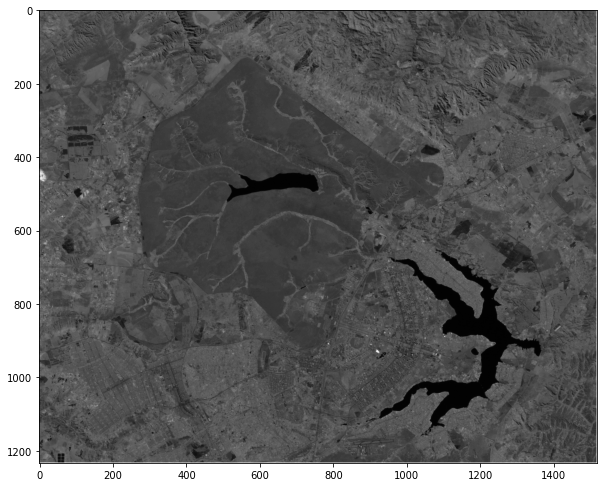

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(img[:,:,0])
plt.imshow(img[:,:,3], cmap='Greys_r')
plt.show()

ImageView object:
  Display bands       :  [0, 3.0, 5]
  Interpolation       :  <default>
  RGB data limits     :
    R: [40.0, 255.0]
    G: [12.0, 255.0]
    B: [1.0, 255.0]

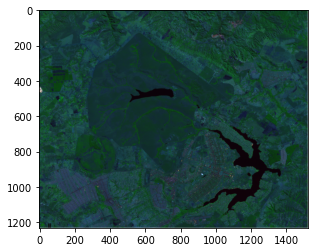

In [16]:
# plot com bandas aleatórias
imshow(img)

ImageView object:
  Display bands       :  (2, 1, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [13.0, 255.0]
    B: [40.0, 255.0]

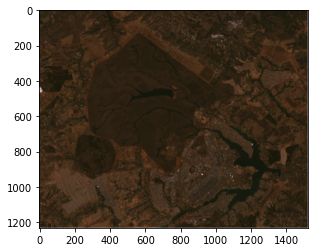

In [15]:
imshow(img, bands=(2,1,0))

ImageView object:
  Display bands       :  (2, 3, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

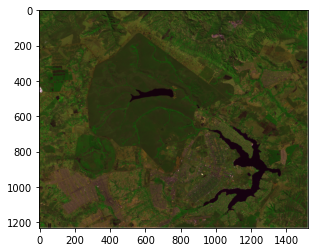

In [ ]:
imshow(img, bands=(2,3,0))

**GDAL**

In [18]:
from osgeo import gdal

In [19]:
img2 = gdal.Open("/content/drive/MyDrive/Colab Notebooks/PDI_com_Python/Modulo_02/L71221071_07120010720_DN.tif")
print(img2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f0e4448f810> >


In [20]:
img3 = img2.ReadAsArray()

In [21]:
# Dimensões trocadas
img3.shape

(6, 1233, 1520)

In [22]:
img3 = img3.swapaxes(0,1)
img3 = img3.swapaxes(1,2)

In [23]:
img3.shape

(1233, 1520, 6)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [12.0, 255.0]
    G: [12.0, 255.0]
    B: [12.0, 255.0]

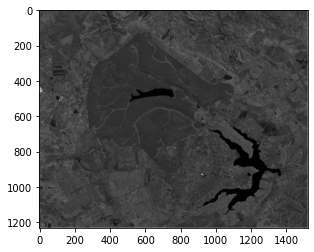

In [24]:
imshow(img3[:,:,3])

ImageView object:
  Display bands       :  (2, 3, 1)
  Interpolation       :  <default>
  RGB data limits     :
    R: [4.0, 255.0]
    G: [12.0, 255.0]
    B: [13.0, 255.0]

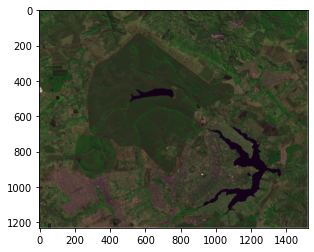

In [25]:
imshow(img3, (2,3,1))

In [27]:
b1 = img2.GetRasterBand(1).ReadAsArray()
b2 = img2.GetRasterBand(2).ReadAsArray()
b4 = img2.GetRasterBand(4).ReadAsArray()

# Empilhar as bandas
stack = np.dstack([b1,b2,b4])
stack.shape


(1233, 1520, 3)

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

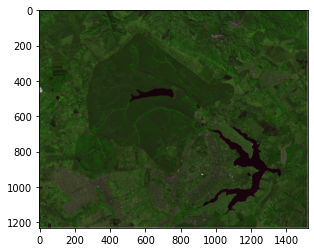

In [29]:
imshow(stack, (1,2,0))

**RASTERIO**

In [30]:
import rasterio
from rasterio.plot import show


In [31]:
rst = rasterio.open("/content/drive/MyDrive/Colab Notebooks/PDI_com_Python/Modulo_02/L71221071_07120010720_DN.tif")
print(rst)

<open DatasetReader name='/content/drive/MyDrive/Colab Notebooks/PDI_com_Python/Modulo_02/L71221071_07120010720_DN.tif' mode='r'>


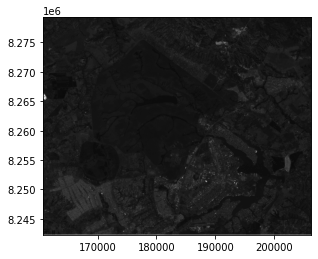

In [33]:
show(rst, cmap='Greys_r')

ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

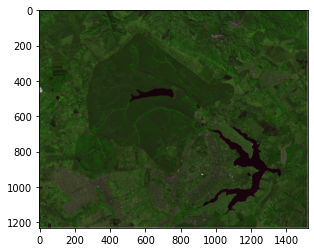

In [35]:
# Transformar em estrutura do numpy
b1 = rst.read(1)
b2 = rst.read(2)
b4 = rst.read(4)

stack = np.dstack([b1,b2,b4])

imshow(stack, (1,2,0))


ImageView object:
  Display bands       :  (1, 2, 0)
  Interpolation       :  <default>
  RGB data limits     :
    R: [13.0, 255.0]
    G: [12.0, 255.0]
    B: [40.0, 255.0]

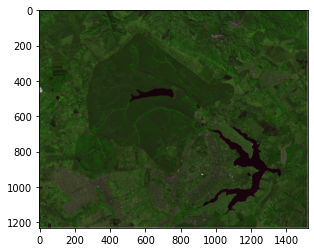

In [37]:
# usar comando with

with rasterio.open('/content/drive/MyDrive/Colab Notebooks/PDI_com_Python/Modulo_02/L71221071_07120010720_DN.tif') as rst:
    b1 = rst.read(1)
    b2 = rst.read(2)
    b4 = rst.read(4)

stack2 = np.dstack([b1,b2,b4])
imshow(stack2, (1,2,0))
